In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
life_expectancy_clean = "resources/life_expectancy_clean.csv"

life_expectancy = pd.read_csv(life_expectancy_clean)

In [4]:
life_expectancy.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B Vaccines,Measles Cases,...,Polio Vaccines,Total Expenditure,Diphtheria Vaccines,HIV/AIDS Deaths Under 5yo,GDP Per Capita,Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.30%,6.20%,0.01,71.28%,65%,115.40%,...,6%,8.16%,65%,0.01%,$584.26,"33,736,494",17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.10%,6.40%,0.01,73.52%,62%,49.20%,...,58%,8.18%,62%,0.01%,$612.70,"327,582",17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.80%,6.60%,0.01,73.22%,64%,43.00%,...,62%,8.13%,64%,0.01%,$631.74,"31,731,688",17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.20%,6.90%,0.01,78.18%,67%,278.70%,...,67%,8.52%,67%,0.01%,$669.96,"3,696,958",17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.50%,7.10%,0.01,7.10%,68%,301.30%,...,68%,7.87%,68%,0.01%,$63.54,"2,978,599",18.2,18.2,0.454,9.5


In [5]:
life_expectancy.describe()

,Year,Life Expectancy,Alcohol,BMI,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
count,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000
mean,2007.016349,69.341845,4.538248,38.234566,4.903893,4.942156,0.627501,12.038926
std,4.332164,9.391106,4.011904,19.767293,4.505040,4.596621,0.210369,3.254761
min,2000.000000,36.300000,0.010000,1.000000,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.700000,0.850000,19.100000,1.600000,1.600000,0.494000,10.100000
50%,2007.000000,72.200000,3.760000,43.800000,3.300000,3.300000,0.677000,12.300000
75%,2011.000000,75.400000,7.530000,55.800000,7.300000,7.300000,0.779000,14.200000
max,2015.000000,89.000000,17.870000,77.100000,27.700000,28.600000,0.948000,20.700000


In [6]:
mean = life_expectancy.groupby('Country')["Life Expectancy"].mean()
median = life_expectancy.groupby('Country')["Life Expectancy"].median()
var = life_expectancy.groupby('Country')["Life Expectancy"].var()
std = life_expectancy.groupby('Country')["Life Expectancy"].std()
summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var,"Standard Dev.": std})
summary_statistics.head()

,Mean,Median,Variance,Standard Dev.
Country,,,,
Afghanistan,58.193750,57.8,5.667292,2.380607
Albania,75.156250,75.6,3.373292,1.836652
Algeria,73.486667,73.8,2.284095,1.511322
Angola,48.793333,48.2,7.763524,2.786310
Antigua and Barbuda,74.966667,75.0,0.720952,0.849089


In [7]:
life_expectancy["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
developed_countries = life_expectancy.loc[life_expectancy["Status"] == "Developed",:]
developed_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B Vaccines,Measles Cases,...,Polio Vaccines,Total Expenditure,Diphtheria Vaccines,HIV/AIDS Deaths Under 5yo,GDP Per Capita,Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
107,Australia,2014,Developed,82.7,0.60%,0.10%,9.71,"10,769.36%",91%,34.00%,...,92%,9.42%,92%,0.01%,"$62,214.69","2,346,694",0.6,0.6,0.936,20.4
108,Australia,2013,Developed,82.5,6.10%,0.10%,9.87,"11,734.85%",91%,15.80%,...,91%,9.36%,91%,0.01%,"$67,792.34","23,117,353",0.6,0.6,0.933,20.3
109,Australia,2012,Developed,82.3,6.10%,0.10%,10.03,"11,715.00%",91%,19.90%,...,92%,9.36%,92%,0.01%,"$67,677.63","22,728,254",0.6,0.6,0.930,20.1
110,Australia,2011,Developed,82.0,6.30%,0.10%,10.30,"10,986.27%",92%,19.00%,...,92%,9.20%,92%,0.01%,"$62,245.13","223,424",0.6,0.6,0.927,19.8
111,Australia,2010,Developed,81.9,6.40%,0.10%,10.52,"8,875.79%",92%,7.00%,...,92%,9.20%,92%,0.01%,"$51,874.85","223,175",0.7,0.6,0.927,19.5


In [9]:
mean_life_expectancy_alcohol_developed = developed_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Alcohol" : np.mean})                                                             

mean_life_expectancy_alcohol_developed.head()


,Country,Life Expectancy,Alcohol
0,Australia,81.746667,10.155333
1,Austria,81.480000,12.236000
2,Belgium,80.653333,11.042667
3,Bulgaria,72.740000,10.865333
4,Croatia,75.993333,12.448000


<IPython.core.display.Javascript object>


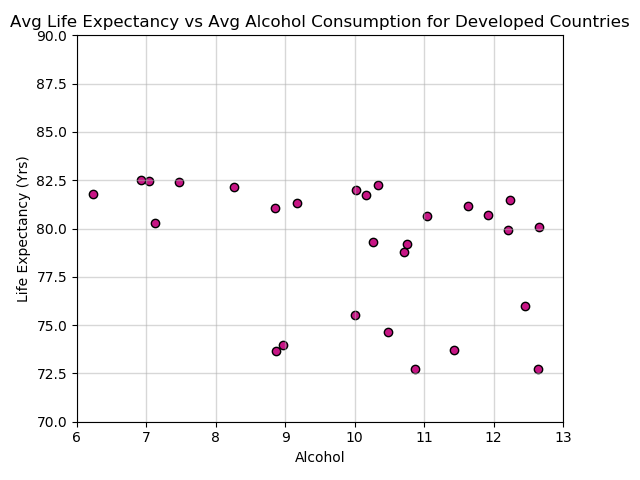

In [20]:
x = mean_life_expectancy_alcohol_developed["Alcohol"]
y = mean_life_expectancy_alcohol_developed["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumvioletred", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg Alcohol Consumption for Developed Countries")
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(70, 90)
plt.xlim(6,13)
plt.tight_layout()

In [11]:
mean_life_expectancy_bmi_developed = developed_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "BMI" : np.mean})                                                             

mean_life_expectancy_bmi_developed.head()

,Country,Life Expectancy,BMI
0,Australia,81.746667,55.146667
1,Austria,81.480000,47.666667
2,Belgium,80.653333,50.040000
3,Bulgaria,72.740000,53.753333
4,Croatia,75.993333,51.600000


<IPython.core.display.Javascript object>


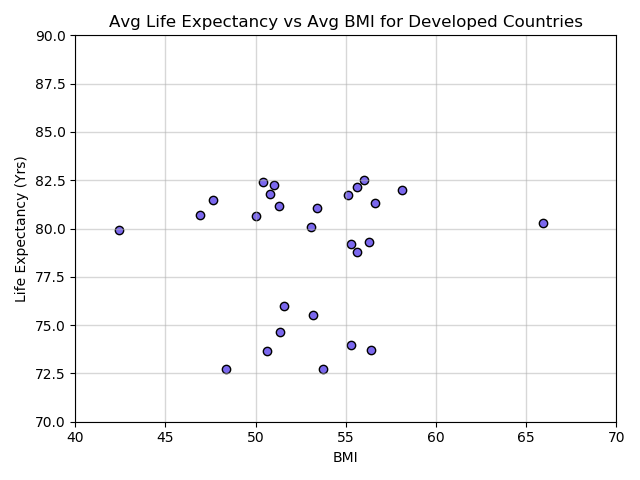

In [21]:
x = mean_life_expectancy_bmi_developed["BMI"]
y = mean_life_expectancy_bmi_developed["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg BMI for Developed Countries")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(70, 90)
plt.xlim(40,70)
plt.tight_layout()

In [13]:
developing_countries = life_expectancy.loc[life_expectancy["Status"] == "Developing",:]
developing_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B Vaccines,Measles Cases,...,Polio Vaccines,Total Expenditure,Diphtheria Vaccines,HIV/AIDS Deaths Under 5yo,GDP Per Capita,Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.30%,6.20%,0.01,71.28%,65%,115.40%,...,6%,8.16%,65%,0.01%,$584.26,"33,736,494",17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.10%,6.40%,0.01,73.52%,62%,49.20%,...,58%,8.18%,62%,0.01%,$612.70,"327,582",17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.80%,6.60%,0.01,73.22%,64%,43.00%,...,62%,8.13%,64%,0.01%,$631.74,"31,731,688",17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.20%,6.90%,0.01,78.18%,67%,278.70%,...,67%,8.52%,67%,0.01%,$669.96,"3,696,958",17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.50%,7.10%,0.01,7.10%,68%,301.30%,...,68%,7.87%,68%,0.01%,$63.54,"2,978,599",18.2,18.2,0.454,9.5


In [14]:
developing_countries.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B Vaccines', 'Measles Cases', 'BMI', 'Under-5yo Deaths',
       'Polio Vaccines', 'Total Expenditure', 'Diphtheria Vaccines',
       'HIV/AIDS Deaths Under 5yo', 'GDP Per Capita', 'Population',
       'Thinness  1-19 yrs', 'Thinness 5-9 yrs',
       'Income Composition of Resources', 'Schooling'],
      dtype='object')

In [15]:
mean_life_expectancy_alcohol_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Alcohol" : np.mean})                                                             

mean_life_expectancy_alcohol_developing.head()


,Country,Life Expectancy,Alcohol
0,Afghanistan,58.193750,0.014375
1,Albania,75.156250,4.848750
2,Algeria,73.486667,0.406667
3,Angola,48.793333,5.740667
4,Antigua and Barbuda,74.966667,7.949333


<IPython.core.display.Javascript object>


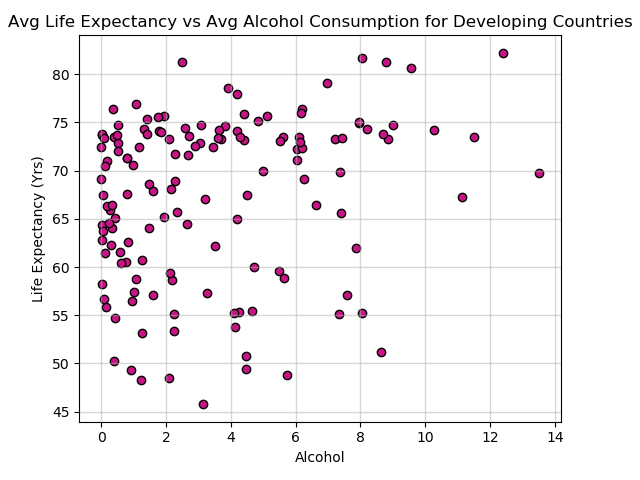

In [25]:
x = mean_life_expectancy_alcohol_developing["Alcohol"]
y = mean_life_expectancy_alcohol_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumvioletred", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg Alcohol Consumption for Developing Countries")
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

In [17]:
mean_life_expectancy_bmi_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "BMI" : np.mean})                                                             

mean_life_expectancy_bmi_developing.head()

,Country,Life Expectancy,BMI
0,Afghanistan,58.193750,15.518750
1,Albania,75.156250,49.068750
2,Algeria,73.486667,48.026667
3,Angola,48.793333,17.666667
4,Antigua and Barbuda,74.966667,37.806667


<IPython.core.display.Javascript object>


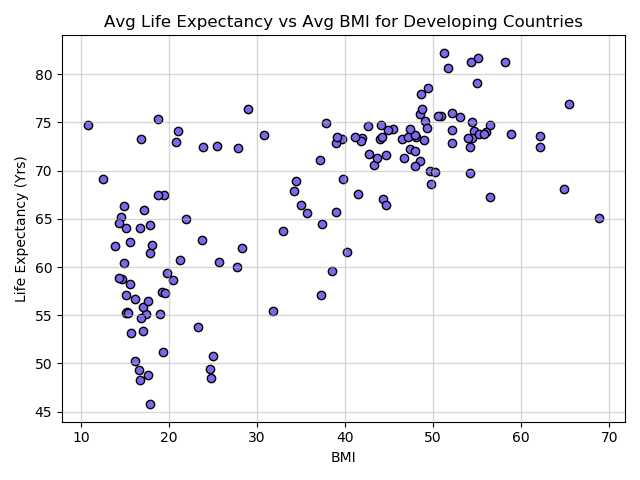

In [26]:
x = mean_life_expectancy_bmi_developing["BMI"]
y = mean_life_expectancy_bmi_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg BMI for Developing Countries")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# plt.ylim(70, 90)
# plt.xlim(40,70)
plt.tight_layout()

In [27]:
mean_life_expectancy_dip_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Diphtheria Vaccines" : np.mean})                                                             

mean_life_expectancy_dip_developing.head()


DataError: No numeric types to aggregate

In [33]:
x = mean_life_expectancy_dip_developing["Diphtheria Vaccines"]
y = mean_life_expectancy_dip_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Diphtheria Vaccinations for Developing Countries")
plt.xlabel("Diphtheria Vaccines")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# plt.ylim(70, 90)
# plt.xlim(40,70)
plt.tight_layout()

NameError: name 'mean_life_expectancy_dip_developing' is not defined

In [34]:
under5_dip_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Under-5yo Deaths" : np.mean,
                                                                                        "Diphtheria Vaccines" : np.mean})                                                             

under5_dip_developing.head()


DataError: No numeric types to aggregate

In [35]:
x = mean_life_expectancy_dip_developing["Diphtheria"]
y = mean_life_expectancy_dip_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Diphtheria Vaccinations for Developing Countries")
plt.xlabel("Diphtheria")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# plt.ylim(70, 90)
# plt.xlim(40,70)
plt.tight_layout()

NameError: name 'mean_life_expectancy_dip_developing' is not defined